In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6561,6562,15650538,Sun,445,Germany,Female,48,7,168286.58,1,1,0,16645.77,1
4489,4490,15787035,Anderson,602,France,Female,35,8,0.00,2,1,1,152843.53,0
2821,2822,15626385,George,714,Spain,Female,33,10,103121.33,2,1,1,49672.01,0
3178,3179,15609669,Chuang,542,France,Female,39,4,109949.39,2,1,1,41268.65,0
1060,1061,15650933,Ma,490,Spain,Female,48,8,155413.06,1,1,0,187921.30,0
9360,9361,15671934,Veale,552,Germany,Male,39,2,132906.88,1,0,1,149384.43,0
8088,8089,15815656,Hopkins,541,Germany,Female,39,9,100116.67,1,1,1,199808.10,1
8550,8551,15709016,North,687,Germany,Female,47,1,91219.29,1,0,0,158845.49,1
8204,8205,15570141,P'eng,724,France,Female,34,3,132352.69,1,1,0,80320.30,0
6801,6802,15776947,Ugorji,637,Spain,Male,43,8,0.00,1,1,0,12156.93,1


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.shape

(10000, 14)

In [7]:
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)


In [8]:
df.shape

(10000, 11)

In [9]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df=pd.get_dummies(df,columns=["Geography","Gender"])

In [11]:
df.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2117,683,31,2,0.00,2,0,1,77326.78,0,True,False,False,False,True
8076,732,36,9,0.00,1,0,0,3749.00,1,True,False,False,True,False
6650,758,41,10,79857.64,1,1,1,78088.17,0,False,True,False,False,True
9867,787,32,4,0.00,2,1,1,13238.93,0,True,False,False,False,True
8176,702,40,3,148556.74,1,0,1,146056.29,0,True,False,False,False,True
7518,500,30,2,125495.64,2,1,1,68807.47,0,False,True,False,False,True
5982,655,37,9,121342.24,1,1,1,180241.44,0,False,True,False,False,True
9379,690,26,2,0.00,2,1,1,93255.85,0,False,False,True,True,False
4996,500,44,9,160838.13,2,1,0,196261.64,0,False,True,False,False,True
4306,476,40,4,0.00,2,0,0,182547.04,0,True,False,False,True,False


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [13]:

X = df.drop(['Exited'], axis=1) 

y = df[['Exited']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [14]:
model_dtc = DecisionTreeClassifier(max_depth=6)

In [15]:
model_dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [16]:
model_dtc.score(X_train,y_train)

0.8654285714285714

In [17]:
model_dtc.score(X_test,y_test)

0.868

VISUALIZATION

<Axes: xlabel='Exited', ylabel='count'>

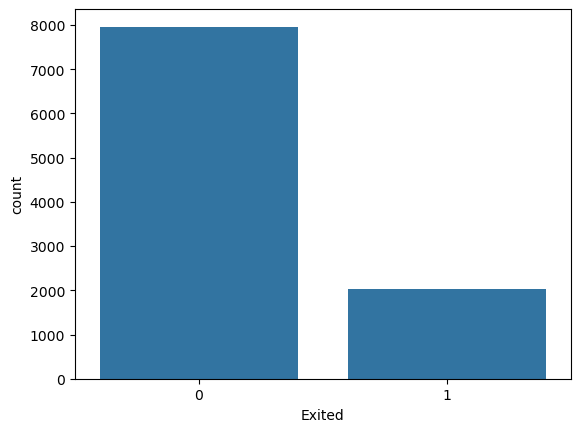

In [18]:
sns.countplot(x="Exited",data=df)

<Axes: xlabel='HasCrCard', ylabel='count'>

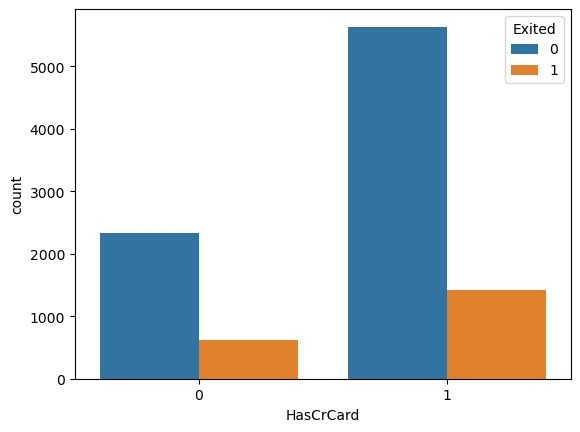

In [19]:
sns.countplot(x="HasCrCard",hue="Exited",data=df)

In [20]:
from sklearn.ensemble import BaggingClassifier

In [21]:
model_bc = BaggingClassifier(n_estimators=250,estimator=model_dtc,warm_start=True)

In [22]:
model_bc.fit(X_train,y_train)

C:\Users\Premalatha\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=6),
                  n_estimators=250, warm_start=True)

In [23]:
model_bc.score(X_train,y_train)

0.8684285714285714

In [24]:
model_bc.score(X_test,y_test)

0.867

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [26]:
model_abc = AdaBoostClassifier(learning_rate=5,n_estimators=500)


In [27]:
model_abc.fit(X_train,y_train)

C:\Users\Premalatha\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=5, n_estimators=500)

In [28]:
model_abc.score(X_train,y_train)

0.7991428571428572

In [29]:
model_abc.score(X_test,y_test)

0.8096666666666666

In [30]:
model_gb = GradientBoostingClassifier()

In [31]:
model_gb.fit(X_train,y_train)

C:\Users\Premalatha\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [32]:
model_gb.score(X_train,y_train)

0.8725714285714286

In [33]:
model_rf = RandomForestClassifier()

In [34]:
model_rf.fit(X_train,y_train)
model_rf.score(X_train,y_train)

C:\Users\Premalatha\AppData\Local\Temp\ipykernel_24112\771388674.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train,y_train)


1.0

In [36]:
model_rf.score(X_test,y_test)

0.8686666666666667